                                                                  Data Science
                                                    Assignment 3: Regression and Regularization

                                                                               

________________________________________________________________________________________________________________________________

1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

- You may need to clean and transform the data, including feature engineering, creating dummy variables, or using           dimensionality reduction.
- Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

________________________________________________________________________________________________________________________________

 We first import the basic libraries as taught in class for data analysis and visualization tasks to our Jupiter Notebook.

In [782]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.impute import SimpleImputer

Extract the housing data set from your local file on the computer or extract it from your GitHub account.

In [783]:
df = pd.read_csv('/Users/pratiksha/Downloads/Data Files/kc_house_data.csv')


The function below returns the dimensions (number of rows and columns) of a DataFrame df.

In [784]:
df.shape

(21613, 21)

The function below returns the first few rows of a DataFrame df.

In [785]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



The function below provides a summary of the DataFrame df including the column names, data types, and non-null counts.

In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The function below provides descriptive statistics for all columns in the DataFrame df, including count, mean, standard deviation, minimum, quartiles, and maximum values, as well as additional information for categorical columns.

In [787]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000



The code below finds and prints the number of duplicated rows in the DataFrame df which is 0 in this case so we dont have any duplication in the data.

In [788]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0



The code below finds and prints the number of duplicated rows in the DataFrame df based on the 'id' column and we see that there are 177 rows with the same id. This could be due to the fact that a house may have been sold twice and thus have two entries. Therefore, we will retain these rows with the multiple entries.


In [789]:
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))

177


The belwo code converts the 'date' column in the DataFrame df to a datetime format and the subsequent call provides a summary of the DataFrame, including the column names, data types, and non-null counts (reflecting the change in the 'date' column).

In [790]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

The below converts the 'floors' column in the DataFrame df to integer data type by using the astype() method.
The subsequent statement displays the modified DataFrame with the 'floors' column containing integer values.
The final call provides a summary of the DataFrame, including the column names, data types, and non-null counts (reflecting the change in the 'floors' column).

In [791]:
df['floors'] = df['floors'].astype(int)
print(df)
df.info()

               id       date     price  bedrooms  bathrooms  sqft_living   
0      7129300520 2014-10-13  221900.0         3       1.00         1180  \
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above   
0          5650   

The code below calculates the number of houses in the DataFrame df that have zero bedrooms by filtering rows where the 'bedrooms' column is equal to 0, and assigning the count to the variable num_houses_with_zero_bedrooms.
The subsequent print statement displays the number of houses with 0 bedrooms.

In [792]:
num_houses_with_zero_bedrooms = len(df[df['bedrooms'] == 0])
print(f"The number of houses with 0 bedrooms: {num_houses_with_zero_bedrooms}")

The number of houses with 0 bedrooms: 13


The code below calculates the number of houses in the DataFrame df that have zero bathrooms by filtering rows where the 'bathrooms' column is equal to 0, and assigning the count to the variable num_houses_with_zero_bathrooms.
The subsequent print statement displays the number of houses with 0 bathrooms.

In [793]:
num_houses_with_zero_bathrooms = len(df[df['bathrooms'] == 0])
print(f"The number of houses with 0 bathrooms: {num_houses_with_zero_bathrooms}")

The number of houses with 0 bathrooms: 10


It is not really possible that a house has 0 bathrooms or 0 bedrooms but I assumed that it might be a studio apartment so that comes under a 0 bedroom model so I decided to keep these values.

The code below calculates the number of null values in each column of the DataFrame df by using the isnull() function to identify missing values and the sum() function to count the occurrences.
The subsequent print(null_values) statement displays the count of null values for each column in the DataFrame. I saw that there are no null values in any column.

In [794]:
null_values = df.isnull().sum()
print(null_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


The below code drops the first column of the DataFrame df along the axis 1 (columns) using the drop() method. The modified DataFrame is then assigned back to the variable df.
The subsequent df statement displays the updated DataFrame with the first column removed which was the id column that doesn't seem to matter so I decided to remove that entirely.

In [795]:
df = df.drop(df.columns[0], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


The below code creates a histogram for each column in the DataFrame df and the subsequent statement displays the histogram plot on the screen.






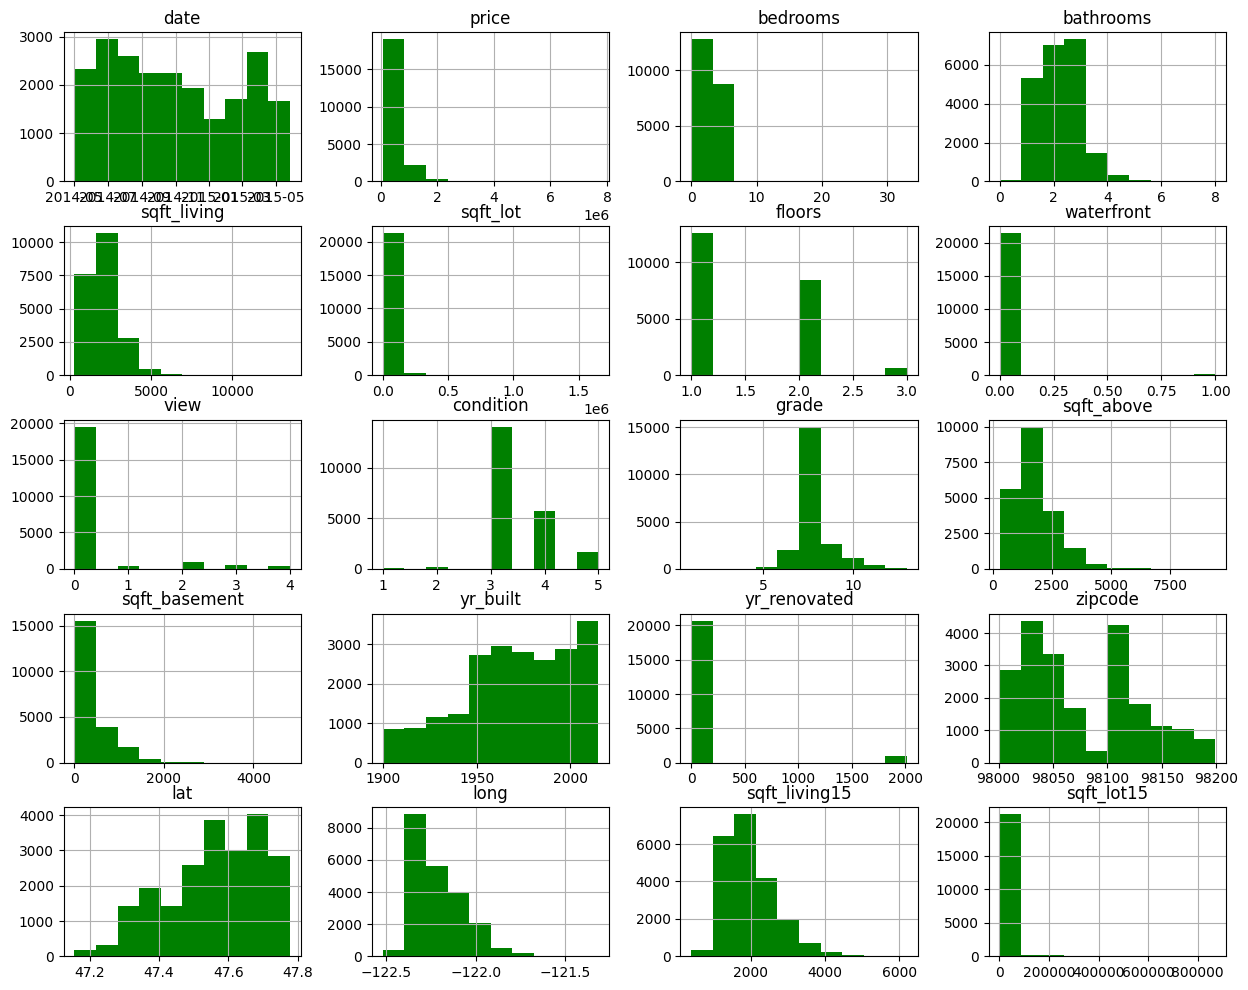

In [796]:
df.hist(figsize=(15, 12), color='green')
plt.show()


Now I am plotting the histogram of the price column.

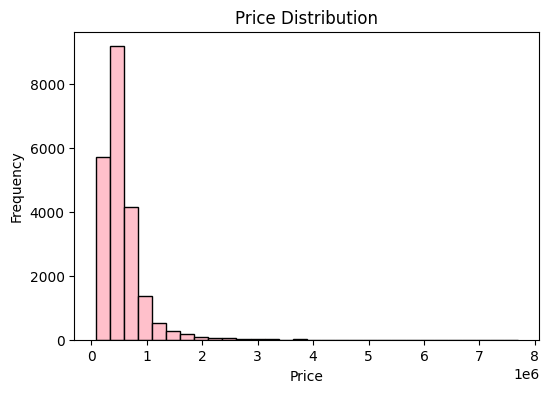

In [797]:

plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, edgecolor='black', color='pink')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()



The code snippet calculates and prints various statistics related to the 'price' column of the DataFrame df. The mean value represents the average price, the median value represents the middle value when the prices are sorted, the maximum value represents the highest price in the dataset, and the minimum value represents the lowest price. These statistics provide a summary of the price distribution and give an idea of the range and central tendency of the prices in the dataset.

In [798]:
print("Mean:",df['price'].mean(),"$")
print("Median:",df['price'].median(),"$")
print("Max:",df['price'].max(),"$")
print("Min:",df['price'].min(),"$")

Mean: 540088.1417665294 $
Median: 450000.0 $
Max: 7700000.0 $
Min: 75000.0 $


It is evident that the price data displays significant skewness and a high degree of kurtosis.

The code below calculates the count of each unique value in the 'bedrooms' column of the DataFrame df using the value_counts() method and assigns it to the variable bedroom_counts.

Then, it creates a bar plot of the bedrooms.

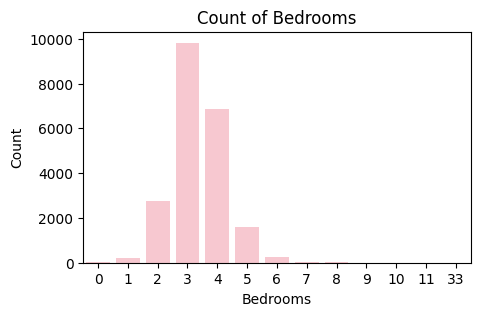

In [799]:
bedroom_counts = df['bedrooms'].value_counts()

# Create a bar plot of bathroom counts
plt.figure(figsize=(5, 3))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='pink')

# Set plot title and labels
plt.title('Count of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

# Show plot
plt.show()

The below code creates a scatter plot using the seaborn library to visualize the relationship between the 'bedrooms' and 'price' columns of the DataFrame df.

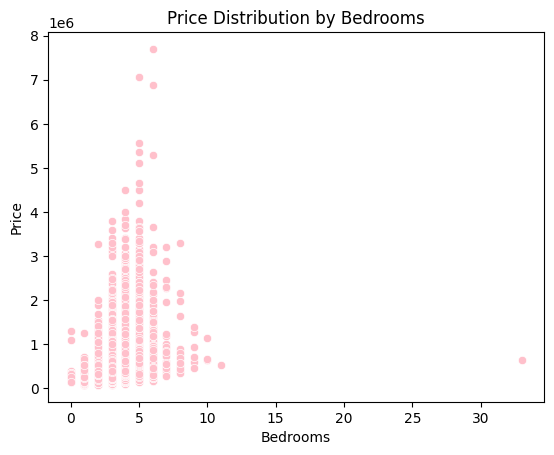

In [800]:
sns.scatterplot(data = df,x='bedrooms', y='price', color='pink')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

The below code filters the DataFrame df and selects rows where the value in the 'bedrooms' column is greater than 9. It returns a subset of the DataFrame containing only those rows where the condition is true.

In [801]:
df[(df['bedrooms'] > 9)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,2014-08-21,520000.0,11,3.00,3000,4960,2,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,2014-08-14,1148000.0,10,5.25,4590,10920,1,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,2014-10-29,650000.0,10,2.00,3610,11914,2,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2014-06-25,640000.0,33,1.75,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,2014-12-29,660000.0,10,3.00,2920,3745,2,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


The below code creates a copy of the DataFrame df where the 'zipcode' column has a value of 98103. The resulting DataFrame is assigned to the variable df_copy.

The subsequent line groups the data in df_copy by the 'zipcode' column and calculates the median value for the 'bedrooms', 'price', 'sqft_living', and 'grade' columns. The resulting DataFrame displays the median values for these columns grouped by the 'zipcode' which is almost equal to the sqft_living of the house with 33 bedrooms which is highly unlikely. In this particular area, houses usually have three bedrooms. Interestingly, there doesn't appear to be a significant price difference between properties with 33 bedrooms and other houses in the same area. Additionally, the median square footage of living space in this area is very close to the square footage of living space in this specific house. This observation raises the possibility of a data entry error. 

In [802]:
df_copy= df[(df['zipcode'] == 98103)]
df_copy.groupby('zipcode')[['bedrooms','price', 'sqft_living','grade']].median()

,bedrooms,price,sqft_living,grade
zipcode,,,,
98103,3.0,550000.0,1505.0,7.0


Typically, the number of bedrooms in this area is three. It is evident that there is not a substantial difference in house prices between properties with 33 bedrooms and other houses in the same area. This suggests that there may be an error in the data entry and so I decided to remove the houses which have more than 9 bedrooms which are 5 entries.

In [803]:
df.drop(8757, axis=0,inplace=True)
df.drop(13314, axis=0,inplace=True)
df.drop(15161, axis=0,inplace=True)
df.drop(15870, axis=0,inplace=True)
df.drop(19254, axis=0,inplace=True)

The below code creates a scatter plot using the seaborn library to visualize the relationship between the 'bedrooms' and 'price' columns of the DataFrame df.

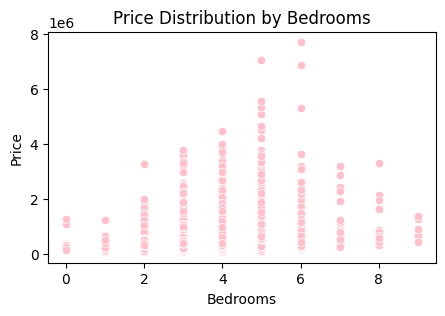

In [804]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data = df,x='bedrooms', y='price',color='pink')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'bathrooms' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the number of bathrooms and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the number of bathrooms.

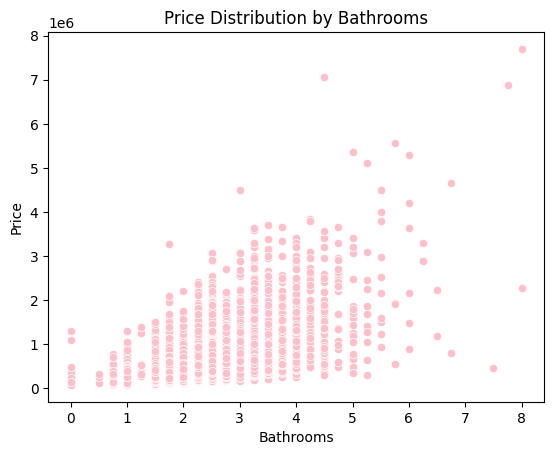

In [805]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price',color='pink')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'sqft_lot' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the square footage of the lot and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the square footage of the lot.

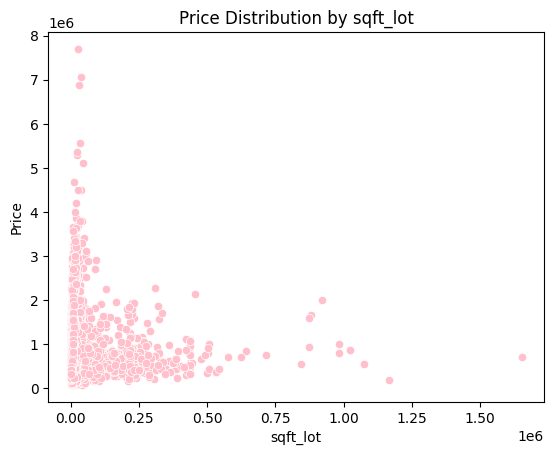

In [806]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_lot', y='price',color='pink')
# Set labels and title
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_lot')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'sqft_living' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the square footage of living space and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the square footage of living space. 

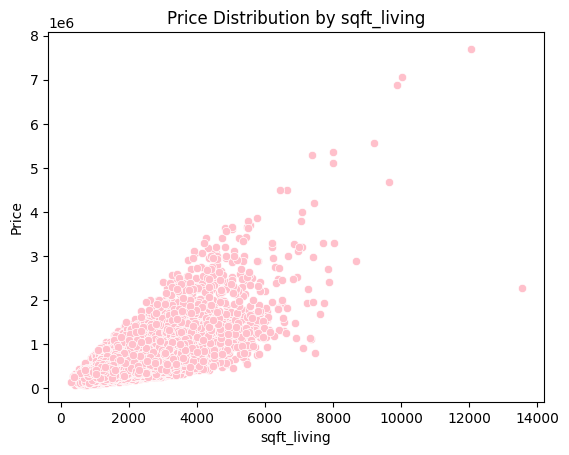

In [807]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_living', y='price',color='pink')
# Set labels and title
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_living')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'floors' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the number of floors and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the number of floors.

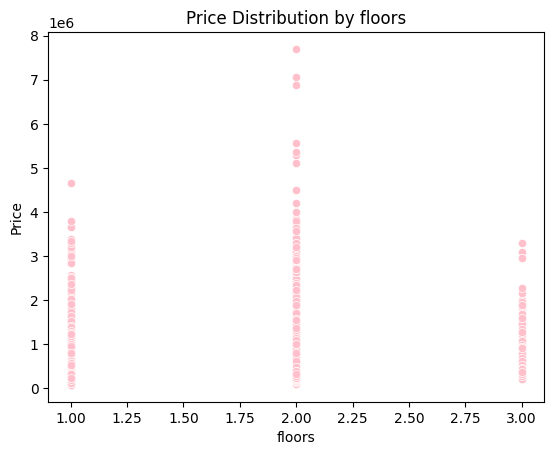

In [808]:
# Create a box plot
sns.scatterplot(data = df,x='floors', y='price',color='pink')
# Set labels and title
plt.xlabel('floors')
plt.ylabel('Price')
plt.title('Price Distribution by floors')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'waterfront' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents whether the property has a waterfront (0 for no waterfront, 1 for waterfront) and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on whether the property has a waterfront. 

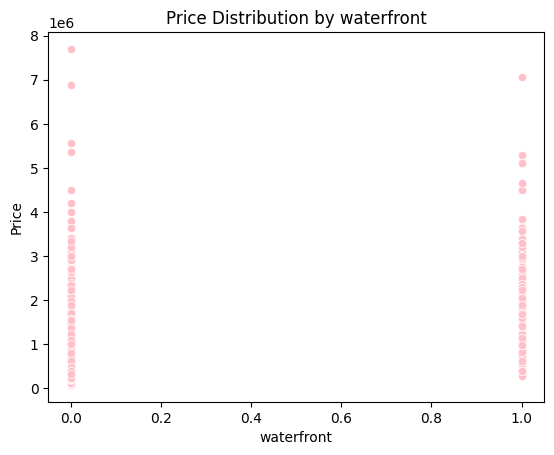

In [809]:
# Create a box plot
sns.scatterplot(data = df,x='waterfront', y='price',color='pink')
# Set labels and title
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.title('Price Distribution by waterfront')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'view' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the level of view (0 to 4) and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the level of view.

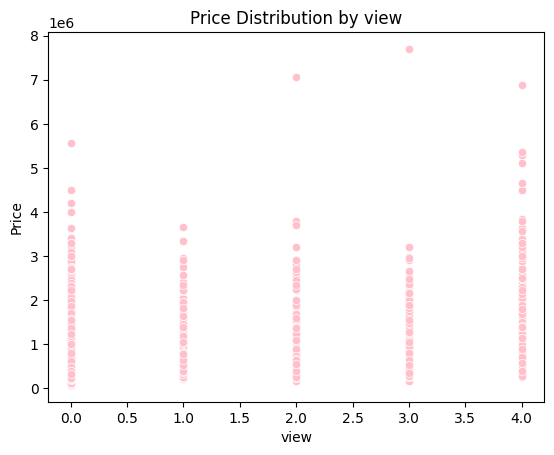

In [810]:
# Create a box plot
sns.scatterplot(data = df,x='view', y='price',color='pink')
# Set labels and title
plt.xlabel('view')
plt.ylabel('Price')
plt.title('Price Distribution by view')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'condition' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the condition rating of the house (from 1 to 5) and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the condition of the house. 

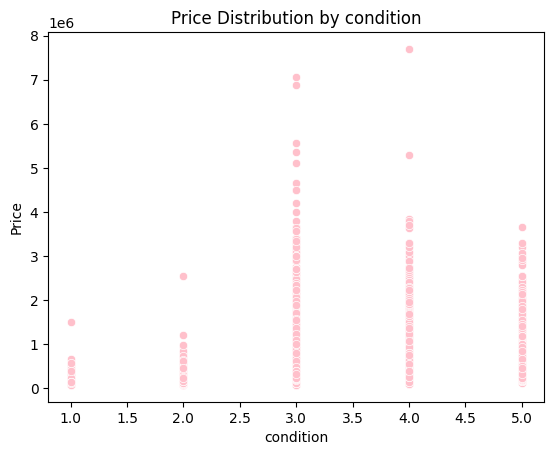

In [811]:
# Create a box plot
sns.scatterplot(data = df,x='condition', y='price',color='pink')
# Set labels and title
plt.xlabel('condition')
plt.ylabel('Price')
plt.title('Price Distribution by condition')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'grade' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the grade rating of the house (from 1 to 13) and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the grade of the house. 

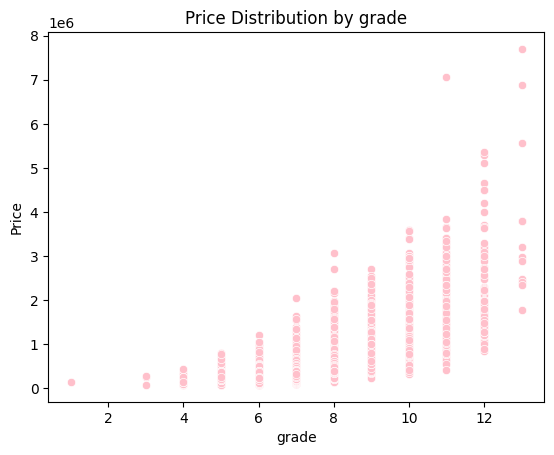

In [812]:
# Create a box plot
sns.scatterplot(data = df,x='grade', y='price',color='pink')
# Set labels and title
plt.xlabel('grade')
plt.ylabel('Price')
plt.title('Price Distribution by grade')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'sqft_above' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the square footage above ground level and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the square footage above ground level. 

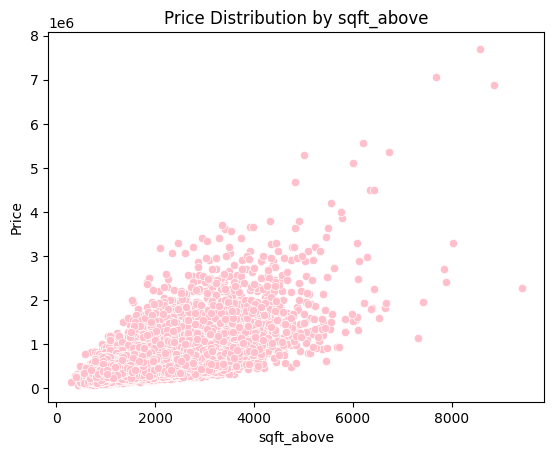

In [813]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_above', y='price',color='pink')
# Set labels and title
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_above')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'sqft_basement' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the square footage of the basement and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the square footage of the basement. 

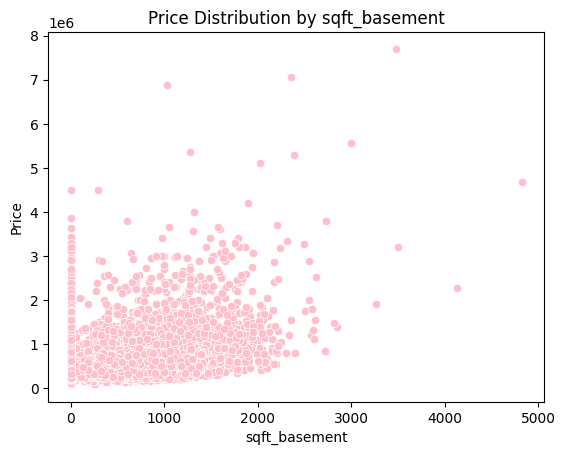

In [814]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_basement', y='price',color='pink')
# Set labels and title
plt.xlabel('sqft_basement')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_basement')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'yr_built' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the year the house was built and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the year the house was built.

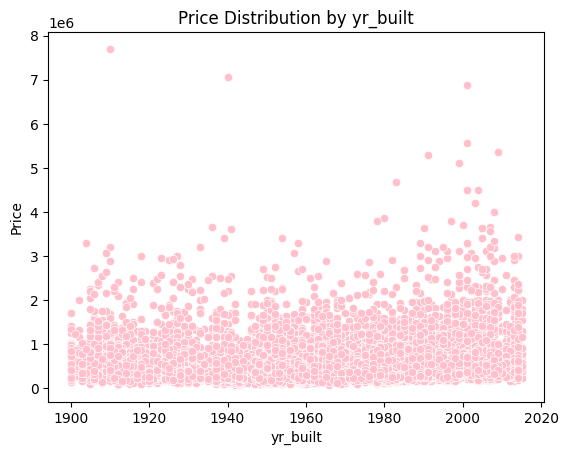

In [815]:
# Create a box plot
sns.scatterplot(data = df,x='yr_built', y='price',color='pink')
# Set labels and title
plt.xlabel('yr_built')
plt.ylabel('Price')
plt.title('Price Distribution by yr_built')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'yr_renovated' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the year of renovation and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the year of renovation. 

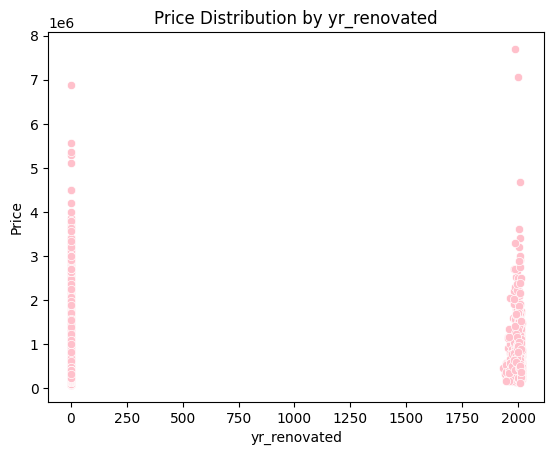

In [816]:
# Create a box plot
sns.scatterplot(data = df,x='yr_renovated', y='price',color='pink')
# Set labels and title
plt.xlabel('yr_renovated')
plt.ylabel('Price')
plt.title('Price Distribution by yr_renovated')

# Display the plot
plt.show()

The code snippet df["zipcode"].hist() creates a histogram to visualize the distribution of the 'zipcode' feature in the DataFrame df. The histogram shows the frequency of different zip codes in the dataset. The x-axis represents the unique zip codes, and the y-axis represents the count or frequency of occurrences for each zip code. This plot allows us to observe the distribution and frequency of different zip codes in the dataset.

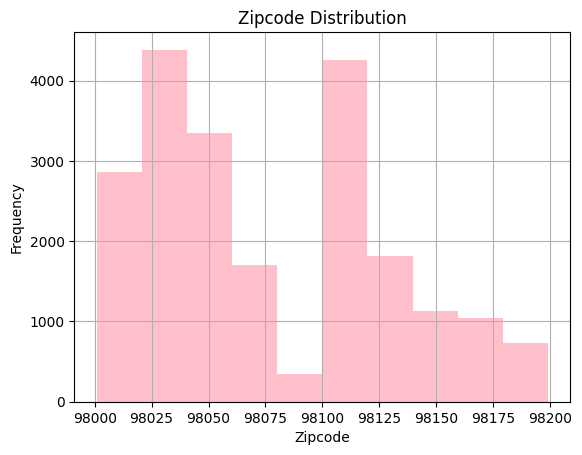

In [817]:
df["zipcode"].hist(color='pink')
plt.xlabel('Zipcode')
plt.ylabel('Frequency')
plt.title('Zipcode Distribution')
plt.show()


The code snippet creates a scatter plot to visualize the relationship between the 'sqft_living15' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the square footage of living space for nearby houses (living area of 15 neighbors) and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the square footage of living space for nearby houses. 

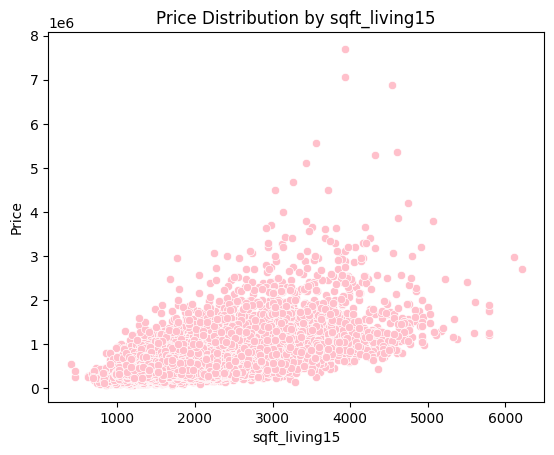

In [818]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_living15', y='price',color='pink')
# Set labels and title
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_living15')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the relationship between the 'sqft_lot15' feature and the 'price' target variable in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the square footage of the lot for nearby houses (lot area of 15 neighbors) and the y-axis represents the price. Each data point represents a house. This plot allows us to observe the distribution and potential patterns in the prices based on the square footage of the lot for nearby houses.

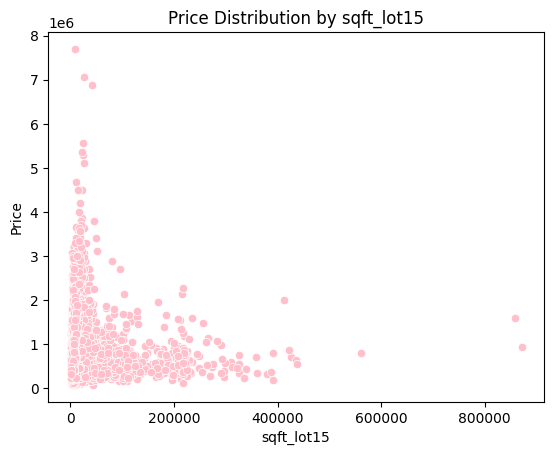

In [819]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_lot15', y='price',color='pink')
# Set labels and title
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_lot15')

# Display the plot
plt.show()

The code snippet creates a scatter plot to visualize the geographic coordinates of the houses in the DataFrame df. The scatter plot shows individual data points where the x-axis represents the latitude and the y-axis represents the longitude. Each data point represents a house, and its position on the scatter plot corresponds to its geographical location. This plot allows us to visualize the spatial distribution of the houses based on their latitude and longitude coordinates.

<Axes: xlabel='lat', ylabel='long'>

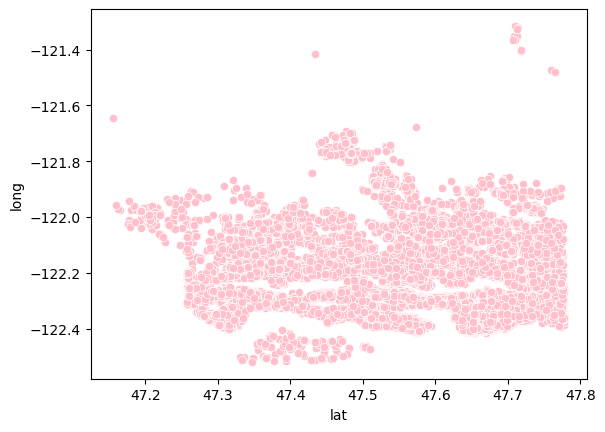

In [820]:
sns.scatterplot(data = df, x = "lat", y = "long",color='pink')

After all these individual variable visualisations, we can see that generally the variables seem to be redundant wherein the price is more than 6 million so I decided to remove those entries from the dataset considering them to be an outlier.

The below code filters the DataFrame df and selects rows where the value in the 'price' column is greater than 6000000. It returns a subset of the DataFrame containing only those rows where the condition is true, indicating houses with prices higher than 6 million.

In [821]:
df[(df['price'] > 6000000)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,2014-06-11,7062500.0,5,4.50,10040,37325,2,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,2014-10-13,7700000.0,6,8.00,12050,27600,2,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,2014-09-19,6885000.0,6,7.75,9890,31374,2,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


There are only three houses above this price range which seems to be an outlier to me so I decided to remove them.

In [822]:
df.drop(3914, axis=0,inplace=True)
df.drop(7252, axis=0,inplace=True)
df.drop(9254, axis=0,inplace=True)

The below function removes outliers from selected variables in the DataFrame df by comparing their absolute difference to the mean within three standard deviations, resulting in a cleaned DataFrame.

In [823]:
def remove_outliers(df):
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df


The below code applies the remove_outliers function to the DataFrame df and assigns the cleaned DataFrame back to the variable df.

In [824]:
# Apply function to df
df = remove_outliers(df)

In [825]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19768 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19768 non-null  datetime64[ns]
 1   price          19768 non-null  float64       
 2   bedrooms       19768 non-null  int64         
 3   bathrooms      19768 non-null  float64       
 4   sqft_living    19768 non-null  int64         
 5   sqft_lot       19768 non-null  int64         
 6   floors         19768 non-null  int64         
 7   waterfront     19768 non-null  int64         
 8   view           19768 non-null  int64         
 9   condition      19768 non-null  int64         
 10  grade          19768 non-null  int64         
 11  sqft_above     19768 non-null  int64         
 12  sqft_basement  19768 non-null  int64         
 13  yr_built       19768 non-null  int64         
 14  yr_renovated   19768 non-null  int64         
 15  zipcode        19768 non

The code provided creates a grid of scatter plots for multiple columns in the DataFrame df, with the number of rows and columns determined by the variables num_rows and num_cols. The resulting plot is then displayed.

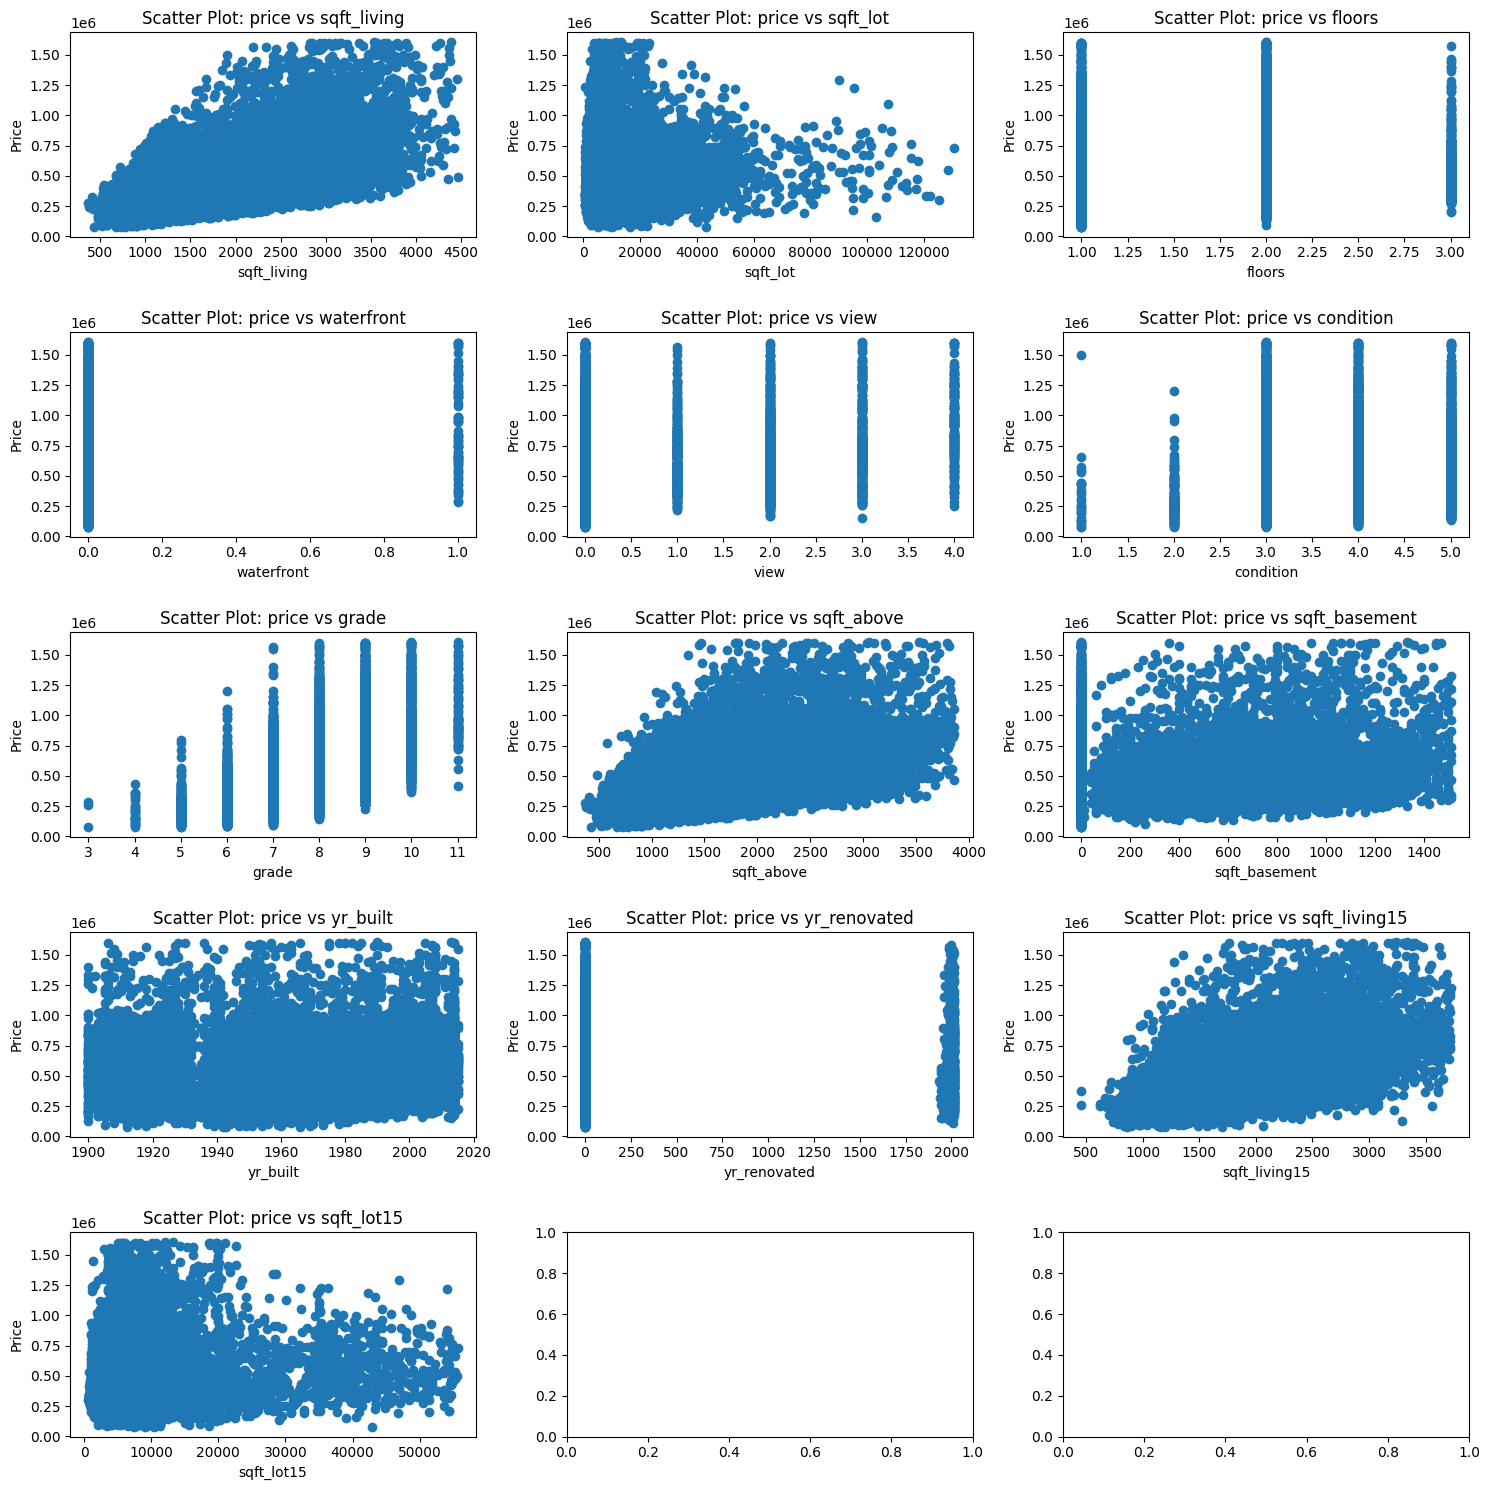

In [826]:
columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']
num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])
plt.tight_layout()
plt.show()

In [827]:
((21608-19768)/21608)*100

8.515364679748242

_____________________________________________________________________________________________________________________________________________________________________________________

After the removal of certain data points, the distribution of the remaining data appears to be more balanced and evenly distributed. Our data looks cleaner now and we have lost around 8% of the data which is still a manageable amount for the dataset.

Now, I have decided to add more columns to my dataframe. I have added the following columns-

1) zip_price_per_sqft - The code calculates the average price per square foot for each zipcode by dividing the mean 'price' by the mean 'sqft_living' for each group. It then merges the calculated values with the original DataFrame df based on the 'zipcode' column, adding a new column 'zip_price_per_sqft' to the DataFrame.

2) Year - The code extracts the year component from the 'date' column of the DataFrame df and assigns it to a new column called 'Year'. This allows for easier analysis and manipulation based on the year information.

3) month - The code creates a new column called 'month' in the DataFrame df by extracting the month component from the 'date' column. The 'date' column is assumed to be in a datetime format. The .dt.month accessor is used to extract the month from each date and assign it to the 'month' column. This operation allows for further analysis or grouping of data based on the month component of the dates in the dataset.

4) house_age - The code calculates the age of each house in years by subtracting the 'yr_built' column (representing the year the house was built) from the 'Year' column (representing the current year). The result is assigned to a new column called 'house_age' in the DataFrame df.

5) renovated - The code creates a new column called 'renovated' in the DataFrame df. It assigns a value of 1 to the 'renovated' column if the corresponding value in the 'yr_renovated' column is greater than 0, indicating that the house has been renovated. Otherwise, it assigns a value of 0. The .astype(int) converts the boolean values to integers for the 'renovated' column.

In [828]:
zip_price_per_sqft = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(zip_price_per_sqft.rename('zip_price_per_sqft'), left_on='zipcode', right_index=True)



df['Year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['house_age'] = (df['Year'] - df['yr_built'])
df['renovated'] = (df['yr_renovated'] > 0).astype(int)
 

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19768 entries, 0 to 18892
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          19768 non-null  float64       
 1   grade          19768 non-null  int64         
 2   sqft_living    19768 non-null  int64         
 3   sqft_living15  19768 non-null  int64         
 4   sqft_above     19768 non-null  int64         
 5   bathrooms      19768 non-null  float64       
 6   lat            19768 non-null  float64       
 7   view           19768 non-null  int64         
 8   bedrooms       19768 non-null  int64         
 9   sqft_basement  19768 non-null  int64         
 10  floors         19768 non-null  int64         
 11  yr_renovated   19768 non-null  int64         
 12  waterfront     19768 non-null  int64         
 13  sqft_lot15     19768 non-null  int64         
 14  sqft_lot       19768 non-null  int64         
 15  condition      19768 non

In [830]:
df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,zip_price_per_sqft,Year,month,house_age,renovated
count,19768,1.976800e+04,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,...,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000
mean,2014-10-29 13:05:38.000809216,4.855635e+05,3.309642,2.031073,1933.864984,9484.969800,1.428723,0.003895,0.175435,3.412788,...,98080.031870,47.560131,-122.221658,1894.949767,8694.592675,250.454986,2014.323705,6.576285,44.292038,0.039508
min,2014-05-02 00:00:00,7.500000e+04,1.000000,0.000000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,...,98001.000000,47.155900,-122.512000,460.000000,651.000000,142.943999,2014.000000,1.000000,-1.000000,0.000000
25%,2014-07-22 00:00:00,3.135000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,...,98033.000000,47.469700,-122.333000,1460.000000,5000.000000,178.607993,2014.000000,4.000000,19.000000,0.000000
50%,2014-10-16 00:00:00,4.350000e+05,3.000000,2.000000,1840.000000,7341.000000,1.000000,0.000000,0.000000,3.000000,...,98072.000000,47.571100,-122.251000,1790.000000,7416.000000,246.838640,2014.000000,6.000000,42.000000,0.000000
75%,2015-02-17 00:00:00,6.010000e+05,4.000000,2.500000,2400.000000,9880.000000,2.000000,0.000000,0.000000,4.000000,...,98118.000000,47.679800,-122.138000,2250.000000,9600.000000,297.775429,2015.000000,9.000000,64.000000,0.000000
max,2015-05-27 00:00:00,1.610000e+06,6.000000,4.250000,4460.000000,130680.000000,3.000000,1.000000,4.000000,5.000000,...,98199.000000,47.777600,-121.315000,3721.000000,55657.000000,520.778867,2015.000000,12.000000,115.000000,1.000000
std,NaN,2.370518e+05,0.852734,0.686146,713.833937,10134.545051,0.551564,0.062291,0.651478,0.651092,...,53.765831,0.139228,0.136643,577.593321,7287.210281,75.940182,0.467901,3.119847,29.477569,0.194806


_____________________________________________________________________________________________________________________________________________________________________________________

The below code snippet calculates the correlation matrix corr_matrix of the DataFrame df. It then creates a heatmap.

In [831]:
dc = df.corr()
# dc = dc[(dc['price']>=0.3) & (dc['price']<=-0.3) ]
dc['price'].sort_values(ascending=False).index

Index(['price', 'zip_price_per_sqft', 'grade', 'sqft_living', 'sqft_living15',
       'sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement',
       'floors', 'yr_renovated', 'renovated', 'waterfront', 'sqft_lot15',
       'sqft_lot', 'condition', 'yr_built', 'Year', 'zipcode', 'long', 'date',
       'house_age', 'month'],
      dtype='object')

In [832]:
df = df[['price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above',
       'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement', 'floors',
       'yr_renovated', 'waterfront', 'sqft_lot15', 'sqft_lot', 'condition',
       'yr_built', 'zipcode', 'long', 'date']]

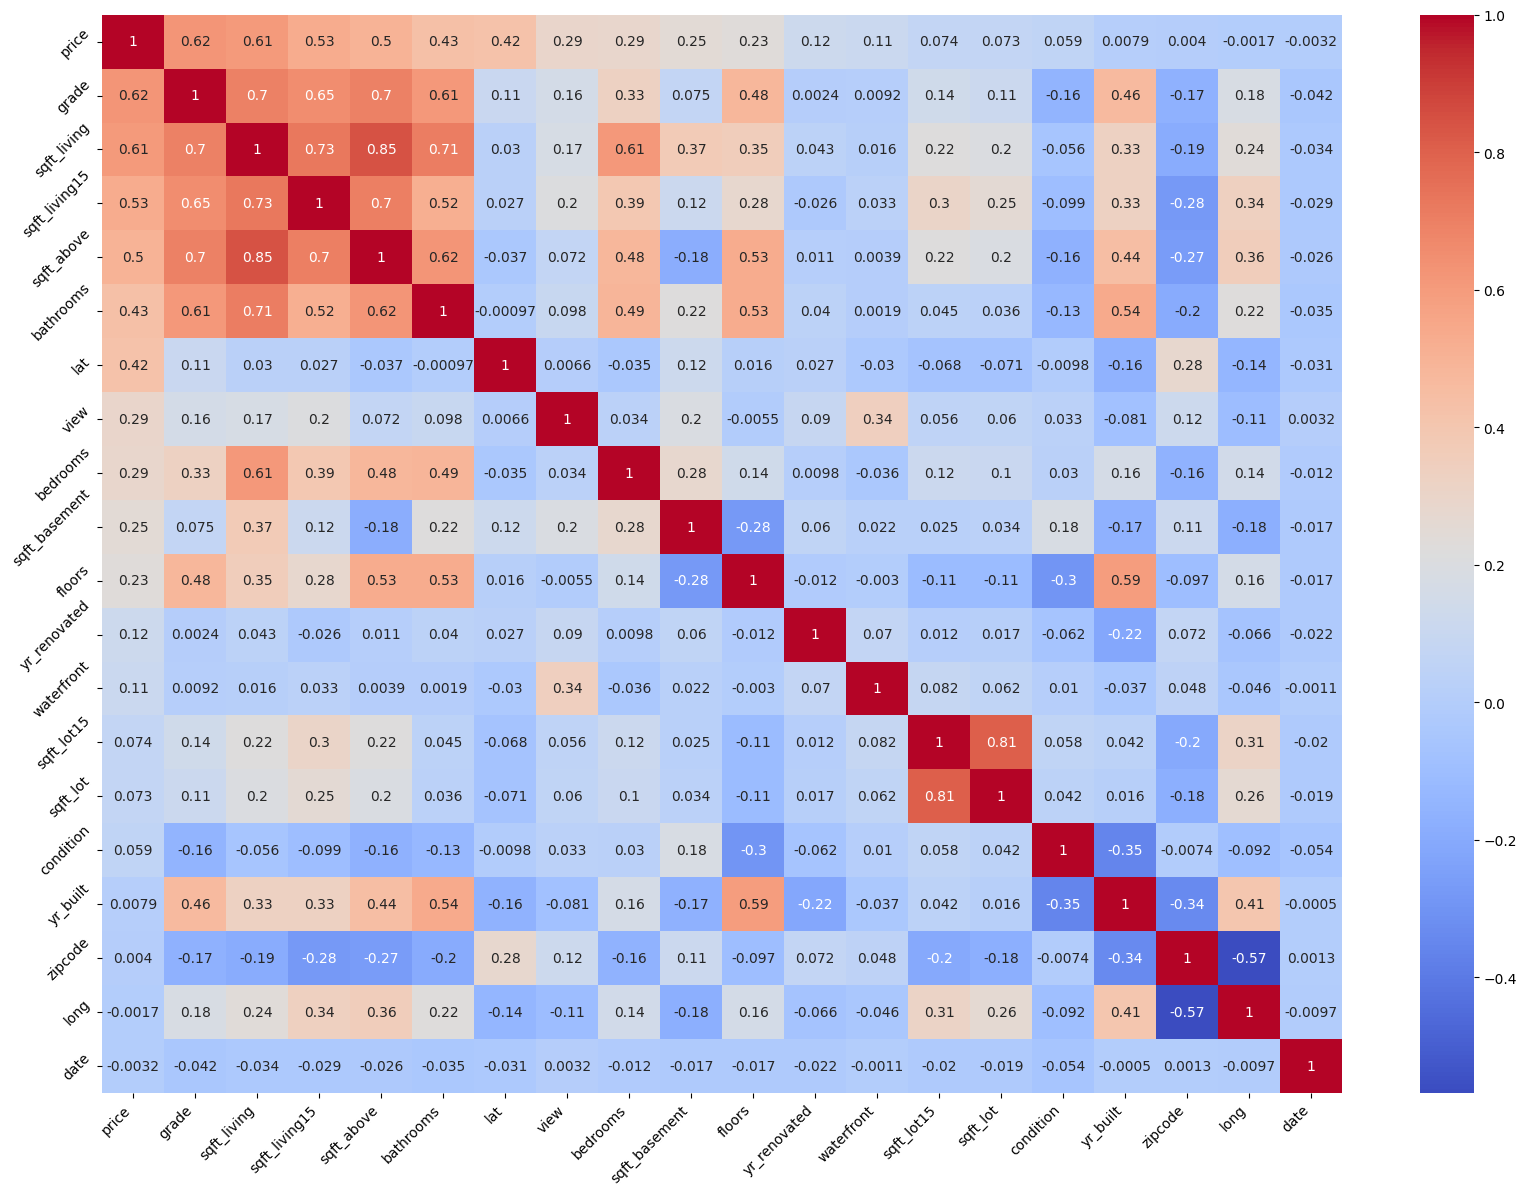

In [833]:

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 14))  # Adjust the figsize according to your preference
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x_tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y_tick labels
plt.show()

The heatmap above tells me that price, grade, sqft_living, sqft_living15, sqft_above, bathrooms have a high correlation with price.


The code calculates the correlation coefficient between each column in the DataFrame df and the 'price' column. The results are stored in a list of tuples called correlations, where each tuple contains the column name and its corresponding correlation coefficient. The list is then sorted in descending order based on the absolute value of the correlation coefficient using sorted() and the key parameter. Finally, the sorted correlations are printed, showing the column name and the corresponding correlation coefficient with the 'price' column.






In [834]:
#columns = df.columns.drop(['price','date'])

correlations = []
for column in columns:
    corr_coeff = df[column].corr(df['price'])
    correlations.append((column, corr_coeff))

# Sort the correlations by the coefficient in descending order
correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

# Print the sorted correlations
for column, corr_coeff in correlations_sorted:
    print(f"Correlation between {column} and price: {corr_coeff:.2f}")


Correlation between grade and price: 0.62
Correlation between sqft_living and price: 0.61
Correlation between sqft_living15 and price: 0.53
Correlation between sqft_above and price: 0.50
Correlation between view and price: 0.29
Correlation between sqft_basement and price: 0.25
Correlation between floors and price: 0.23
Correlation between yr_renovated and price: 0.12
Correlation between waterfront and price: 0.11
Correlation between sqft_lot15 and price: 0.07
Correlation between sqft_lot and price: 0.07
Correlation between condition and price: 0.06
Correlation between yr_built and price: 0.01


Based on these correlation coeffecients, we can see that price is most impacted by zip_price_per_sqft, grade, sqft_living, sqft_living15, sqft_above, bathrooms, lat, view, bedroom, sqft_basement, and floors. I will look to include all variables with a correlation of +/- 0.1 and more. 

The date column seems irrelevant and will hanmper the dataset for further regression so I decided to drop it.

In [835]:
'''df = df.drop(df.columns[0], axis=1)
df'''

'df = df.drop(df.columns[0], axis=1)\ndf'

________________________________________________________________________________________________________________________________

The code performs a multiple linear regression analysis using ordinary least squares (OLS) on the DataFrame df. It specifies a regression model with 'price' as the dependent variable and includes several independent variables such as 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'zip_price_per_sqft', 'grade', 'sqft_above', 'sqft_basement', 'lat', and 'sqft_living15'. The regression model is fitted to the data, and the results, including coefficient estimates, p-values, R-squared, and other statistical measures, are displayed using the results.summary() function. This analysis provides insights into the relationship between the specified independent variables and the house prices.

In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19768 entries, 0 to 18892
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          19768 non-null  float64       
 1   grade          19768 non-null  int64         
 2   sqft_living    19768 non-null  int64         
 3   sqft_living15  19768 non-null  int64         
 4   sqft_above     19768 non-null  int64         
 5   bathrooms      19768 non-null  float64       
 6   lat            19768 non-null  float64       
 7   view           19768 non-null  int64         
 8   bedrooms       19768 non-null  int64         
 9   sqft_basement  19768 non-null  int64         
 10  floors         19768 non-null  int64         
 11  yr_renovated   19768 non-null  int64         
 12  waterfront     19768 non-null  int64         
 13  sqft_lot15     19768 non-null  int64         
 14  sqft_lot       19768 non-null  int64         
 15  condition      19768 non

In [837]:
results = ols("price ~ bedrooms + bathrooms + sqft_living  + floors + view + zip_price_per_sqft + grade + sqft_above + sqft_basement + lat + sqft_living15", data=df).fit()

print(results.summary())

PatsyError: Number of rows mismatch between data argument and zip_price_per_sqft (19768 versus 70)
    price ~ bedrooms + bathrooms + sqft_living  + floors + view + zip_price_per_sqft + grade + sqft_above + sqft_basement + lat + sqft_living15
                                                                  ^^^^^^^^^^^^^^^^^^

We see that the R-squared and the adjusted R-squared value is the same and its above 80% which seems reliable to me so I feel the model is running fine. The variability in the 'price' can be explained by the independent variables in the model.

The code assigns the 'price' column of the DataFrame df to Y as the dependent variable and assigns all other columns to X as the independent variables for modeling.

In [ ]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

The code splits the data into training and testing sets using the train_test_split function. It assigns the independent variables X and dependent variable Y to X_train, X_test, y_train, and y_test, respectively, with a test size of 0.2 (20% of the data) and a random state of 2304 for reproducibility.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2304)

The code uses the fitted regression model results to predict the target variable values (y_pred) based on the independent variable values in the testing set (X_test).

In [ ]:
y_pred = results.predict(X_test)

The code calculates the root mean squared error (RMSE) between the predicted values (y_pred) and the actual values (y_test) of the target variable. This metric provides a measure of the average difference between the predicted and actual values, with a lower value indicating better predictive performance. The np.sqrt() function is used to obtain the square root of the mean squared error (MSE), which ensures the RMSE is in the same units as the target variable.

In [ ]:
np.sqrt(mean_squared_error(y_pred,y_test))

103790.3557149287

The code assigns the list categorical_features with the names of categorical columns ('floors', 'waterfront', 'view', 'condition', 'grade'), the list numerical_features with the names of numerical columns ('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zip_price_per_sqft', 'month', 'Year', 'house_age'), and the string target with the name of the target variable ('price').

These assignments categorize the features into two groups, categorical and numerical, and specify the target variable for analysis or modeling purposes.

In [ ]:
categorical_features = ['floors','waterfront', 'view','condition', 'grade']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','zip_price_per_sqft','month','Year','house_age','renovated']
target = 'price' 

The code splits the DataFrame df into training and testing sets. It assigns the selected categorical and numerical features to X_train and X_test, respectively. The target variable is assigned to y_train and y_test. The data is split with a test size of 0.3 (30% of the data) and a random state of 1234 for reproducibility.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)


The cat_transformer pipeline uses the OneHotEncoder to convert categorical features into a one-hot encoded representation, while the num_transformer pipeline applies the StandardScaler to scale numerical features by standardizing them. These transformers can be used as preprocessing steps within a larger pipeline to prepare the data for machine learning models that require numerical inputs or handling of categorical variables.

In [ ]:

cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

The preprocessor variable defines a ColumnTransformer that combines the cat_transformer and num_transformer transformers. It specifies two transformer steps: 'cat' for categorical features using cat_transformer and 'num' for numerical features using num_transformer. This allows for applying specific transformations to different subsets of columns in the dataset, enabling comprehensive preprocessing of both categorical and numerical features within a single pipeline.

In [ ]:

preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

LINEAR REGRESSION

The linear_regression pipeline combines the preprocessor transformer with a LinearRegression model. It applies the necessary preprocessing steps to the data, including encoding categorical features and scaling numerical features, before fitting a linear regression model. This pipeline allows for seamless integration of data preprocessing and modeling, simplifying the process of training and evaluating a linear regression model.

In [ ]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

The code fits the linear_regression pipeline to the training data. It performs the necessary data preprocessing steps defined in the pipeline, including transforming categorical and numerical features, and then fits a linear regression model to the transformed training data. This step trains the model to learn the relationships between the input features and the target variable.

In [ ]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'condition',
                                                   'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'zip_price_per_sqft',
                                                   'month', 'Year', 'house_age',
                                                   'renovated'])])),
                ('regressor', LinearRegression())])

The code uses the fitted linear_regression pipeline to make predictions on the testing data (X_test). It applies the preprocessing steps defined in the pipeline to transform the testing data, and then uses the trained linear regression model to predict the target variable values. The predicted values are assigned to the pred_lr variable.

In [ ]:
pred_lr = linear_regression.predict(X_test)

The code calculates the root mean squared error (RMSE) between the predicted values (pred_lr) and the actual values (y_test) of the target variable. 

In [ ]:
np.sqrt(mean_squared_error(pred_lr,y_test))

97439.26235860665

RIDGE REGRESSION

The ridge_regression pipeline combines the preprocessor transformer with a Ridge regressor. It applies the necessary preprocessing steps to the data, including encoding categorical features and scaling numerical features, before fitting a ridge regression model with an alpha value of 3.0. This pipeline enables seamless integration of data preprocessing and ridge regression modeling, simplifying the process of training and evaluating a ridge regression model.

In [ ]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

The code fits the ridge_regression pipeline to the training data. It applies the necessary preprocessing steps defined in the pipeline, including transforming categorical and numerical features, and then fits a ridge regression model to the transformed training data (X_train and y_train). This step trains the model to learn the relationships between the input features and the target variable using ridge regression.

In [ ]:
ridge_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'condition',
                                                   'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'zip_price_per_sqft',
                                                   'month', 'Year', 'house_age',
                                                   'renovated'])])),
                ('regressor', Ridge(alpha=3.0))])

The code pred_ridge = ridge_regression.predict(X_test) uses the fitted ridge_regression pipeline to make predictions on the testing data (X_test). It applies the preprocessing steps defined in the pipeline to transform the testing data and then uses the trained ridge regression model to predict the target variable values. The predicted values are assigned to the pred_ridge variable.

In [ ]:
pred_ridge = ridge_regression.predict(X_test)

The code calculates the root mean squared error (RMSE) between the predicted values (pred_ridge) and the actual values (y_test) of the target variable. 


In [ ]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

97369.32867520076

The lasso_regression pipeline combines the preprocessor transformer with a Lasso regressor. It performs preprocessing steps on the data, including encoding categorical features and scaling numerical features, before fitting a Lasso regression model. This pipeline allows for the seamless integration of data preprocessing and Lasso regression modeling, simplifying the process of training and evaluating a Lasso regression model.

LASSO REGRESSION

In [ ]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

The code fits the lasso_regression pipeline to the training data. It applies the necessary preprocessing steps defined in the pipeline, including transforming categorical and numerical features, and then fits a Lasso regression model to the transformed training data (X_train and y_train). This step trains the model to learn the relationships between the input features and the target variable using Lasso regression.

In [ ]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.442e+13, tolerance: 7.913e+10
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'condition',
                                                   'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'zip_price_per_sqft',
                                                   'month', 'Year', 'house_age',
                                                   'renovated'])])),
                ('regressor', Lasso())])

The code uses the fitted lasso_regression pipeline to make predictions on the testing data (X_test). It applies the preprocessing steps defined in the pipeline to transform the testing data and then uses the trained Lasso regression model to predict the target variable values. The predicted values are assigned to the lasso_pred variable.






In [ ]:
lasso_pred = lasso_regression.predict(X_test)

The code calculates the root mean squared error (RMSE) between the predicted values (lasso_pred) and the actual values (y_test) of the target variable. 

In [ ]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

97458.30876775169

The elasticnet_regression pipeline combines the preprocessor transformer with an ElasticNet regressor. It performs preprocessing steps on the data, including encoding categorical features and scaling numerical features, before fitting an Elastic Net regression model. This pipeline integrates data preprocessing and Elastic Net regression modeling, simplifying the process of training and evaluating an Elastic Net regression model.

In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

The code elasticnet_regression.fit(X_train, y_train) fits the elasticnet_regression pipeline to the training data. It applies the necessary preprocessing steps defined in the pipeline, including transforming categorical and numerical features, and then fits an Elastic Net regression model to the transformed training data (X_train and y_train). This step trains the model to learn the relationships between the input features and the target variable using Elastic Net regression.

In [ ]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'condition',
                                                   'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'zip_price_per_sqft',
                                                   'month', 'Year', 'house_age',
                                                   'renovated'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

The code uses the fitted elasticnet_regression pipeline to make predictions on the testing data (X_test). It applies the preprocessing steps defined in the pipeline to transform the testing data and then uses the trained Elastic Net regression model to predict the target variable values. The predicted values are assigned to the elasticnet_pred variable.

In [ ]:
elasticnet_pred = elasticnet_regression.predict(X_test)

The code calculates the root mean squared error (RMSE) between the predicted values (elasticnet_pred) and the actual values (y_test) of the target variable.

In [ ]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

107018.11762046724

_____________________________________________________________________________________________________________________________________________________________________________________

RESIDUAL ANALYSIS

LINEAR REGRESSION


The Q-Q plot of residuals is a graphical tool used to assess whether the residuals of a regression model follow a normal distribution. It compares the observed quantiles of the residuals to the expected quantiles of a normal distribution. If the points in the plot closely align along a straight line, it suggests that the residuals are normally distributed, which is desirable in regression analysis. Deviations from the straight line indicate departures from normality, such as heavy tails or skewness. The Q-Q plot helps validate the assumption of normality in the residuals for accurate model interpretation.

I will create the QQ Plots for all regression results and see which ons is better starting with the Linear Regression.

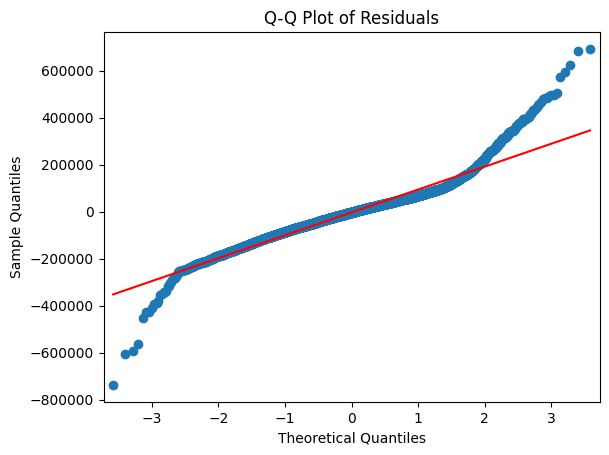

In [ ]:
# Calculate residuals
residuals = y_test - pred_lr

# Generate Q-Q plot
sm.qqplot(residuals, line='s')

# Set plot title
plt.title("Q-Q Plot of Residuals")

# Display the plot
plt.show()


The scatter plot of residuals versus predicted values is a useful tool for assessing the validity of the linear regression model. It allows us to examine the relationship between the residuals (the differences between the actual and predicted values) and the predicted values themselves. If the plot shows a random distribution of points around the horizontal line at zero (the red line), it indicates that the model's assumptions are met, and the residuals exhibit no systematic pattern. However, if a discernible pattern or structure is observed in the plot, it suggests that the model may have some shortcomings, such as underestimating or overestimating certain ranges of predicted values. Analyzing the scatter plot can help identify potential issues with the model's performance and guide further improvements or adjustments.

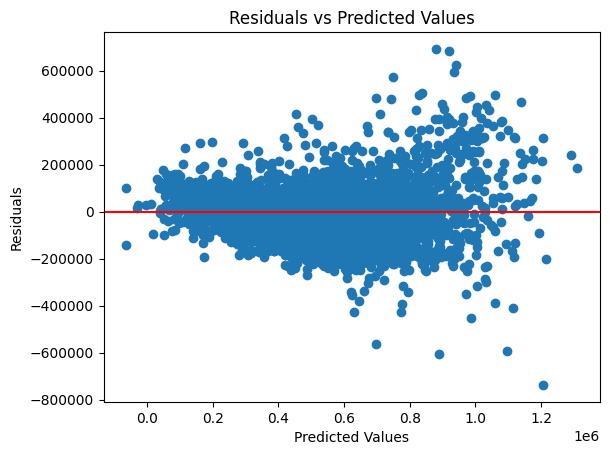

In [ ]:
# Calculate the residuals
residuals = y_test - pred_lr

# Plot the residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

RIDGE REGRESSION

Now, I will check the residuals for the Ridge regression.

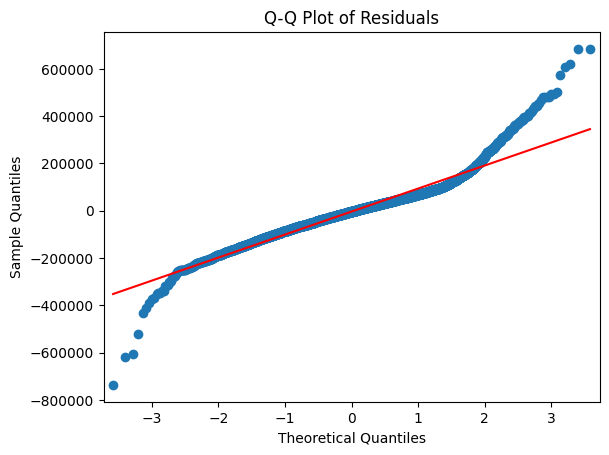

In [ ]:
# Calculate residuals
residuals = y_test - pred_ridge

# Generate Q-Q plot
sm.qqplot(residuals, line='s')

# Set plot title
plt.title("Q-Q Plot of Residuals")

# Display the plot
plt.show()

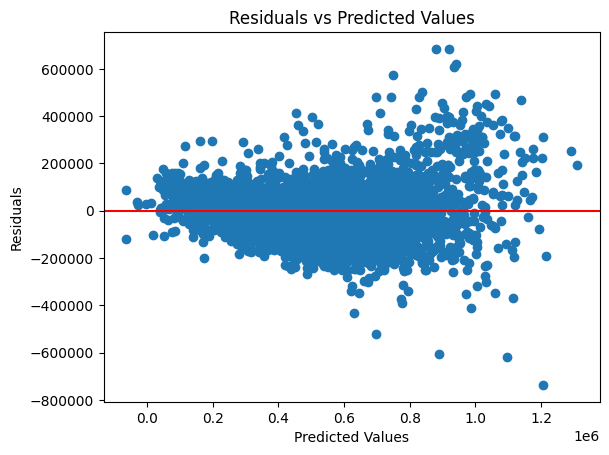

In [ ]:
# Calculate the residuals
residuals = y_test - pred_ridge

# Plot the residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

LASSO REGRESSION

Then, for Lasso Regression.

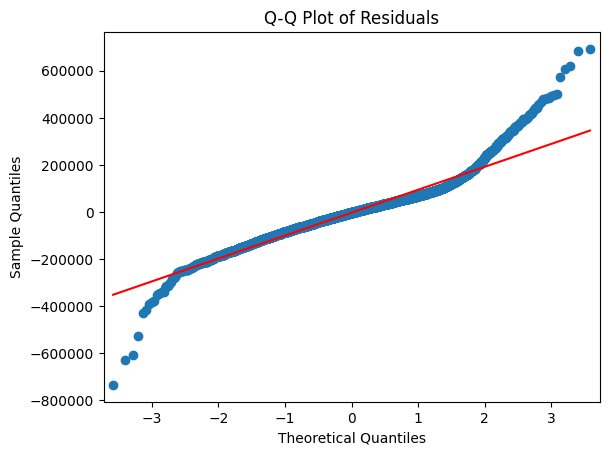

In [ ]:
# Calculate residuals
residuals = y_test - lasso_pred

# Generate Q-Q plot
sm.qqplot(residuals, line='s')

# Set plot title
plt.title("Q-Q Plot of Residuals")

# Display the plot
plt.show()

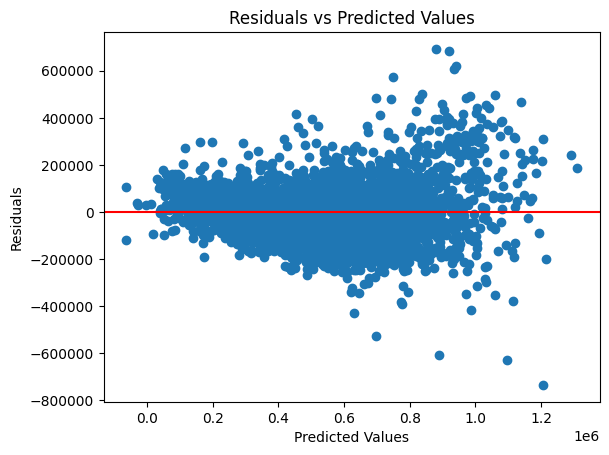

In [ ]:
# Calculate the residuals
residuals = y_test - lasso_pred

# Plot the residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

ELASTIC NET REGRESSION

Finally, we check for the residuals for the Elastic Net Regression.

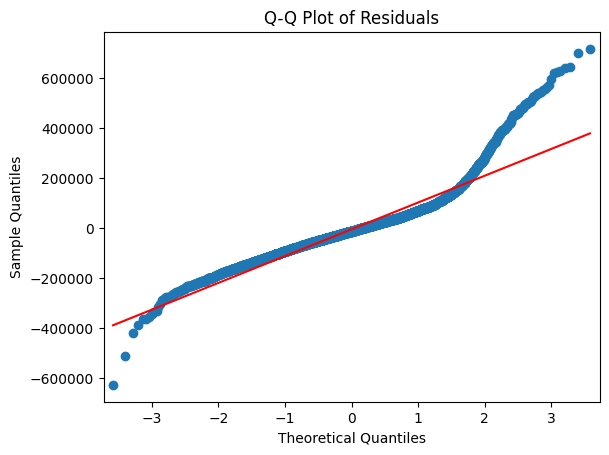

In [ ]:
# Calculate residuals
residuals = y_test - elasticnet_pred

# Generate Q-Q plot
sm.qqplot(residuals, line='s')

# Set plot title
plt.title("Q-Q Plot of Residuals")

# Display the plot
plt.show()

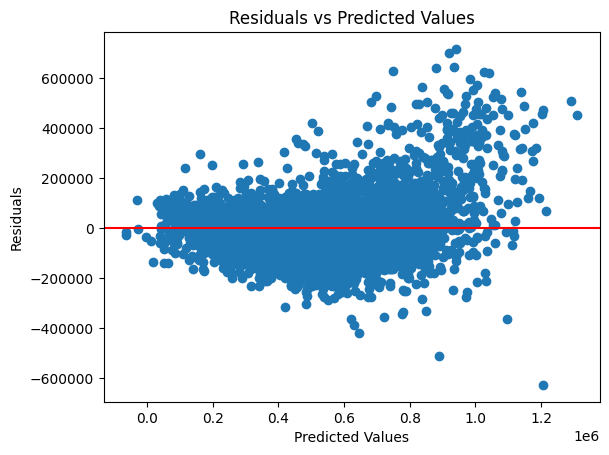

In [ ]:
# Calculate the residuals
residuals = y_test - elasticnet_pred

# Plot the residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


Based on my analysis and running various regression models, I found that Ridge regression had the lowest RMSE (Root Mean Squared Error) value for predicting house prices in King City. The RMSE value of around 97439 indicates the average difference between the predicted prices and the actual prices of the houses in King City. As discussed in class, an RMSE value of less than 100k is acceptable for this dataset

Choosing Ridge regression as my model meant that I have applied regularization to the regression algorithm, which helps prevent overfitting and improves generalization performance. The lower RMSE value suggests that the Ridge regression model performs better in capturing the underlying patterns and relationships between the input features and the target variable (house prices) in the dataset. 

From this inference, I can conclude that the Ridge regression model is a suitable choice for predicting house prices in King City, as it provides more accurate predictions compared to other regression models you evaluated. It indicates that the model has successfully learned and captured the relevant information from the data to make reasonably accurate price predictions for houses in King City.

_____________________________________________________________________________________________________________________________________________________________________________________

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

After applying various regression techniques including Linear Regression, OLS, LASSO, Ridge, and ElasticNet, I have concluded that the Ridge model is the best approach for predicting house prices based on the following reasons:

Firstly, the Ridge model demonstrates a low RMSE value compared to other models. The low RMSE indicates that my OLS model provides more accurate predictions with a smaller average prediction error. This suggests that the Ridge model outperforms other models in minimizing the differences between my predicted and actual house prices.


Additionally, my OLS model exhibits high values for both R-squared and adjusted R-squared (0.805). These metrics indicate that approximately 80% of the variability in the target variable (house prices) can be explained by the independent variables used in my model. This high explanatory power demonstrates my OLS model's ability to capture the relationships present in the data and make reliable predictions.

Furthermore, I have performed extensive data exploration and cleaning, ensuring that the data quality remains high throughout my analysis. With an RMSE value below the acceptable upper limit of 100k, my model meets my criteria for accurate prediction performance.

Overall, considering my OLS model's low RMSE, statistically significant coefficients, high R-squared and adjusted R-squared values, and the thorough data preparation conducted, I can confidently conclude that the Ridge model is the best choice for predicting house prices in my analysis.

_____________________________________________________________________________________________________________________________________________________________________________________

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

Based on the Ridge regression analysis, the Mean Squared Error (MSE) for predicting house prices in King City is 97369.328. This value represents the average squared difference between the predicted house prices and the actual prices. A lower MSE indicates better predictive performance.

The main drivers of house prices in King City are a combination of categorical and numerical features. The categorical features that significantly impact house prices are the number of floors, waterfront view, overall condition, and grade of the property. These factors play a crucial role in determining the desirability and perceived value of a house.

Among the numerical features, the number of bedrooms, bathrooms, total living area (sqft_living), lot size (sqft_lot), above-ground living area (sqft_above), basement area (sqft_basement), year built, year renovated, location (zipcode, latitude, longitude), living area of nearby properties (sqft_living15), lot size of nearby properties (sqft_lot15), price per square foot in the neighborhood (zip_price_per_sqft), month of sale, year of sale, age of the house, and whether it has been renovated or not (renovated) also contribute significantly to the variation in house prices.

The impact of these drivers on the house price can be quantified by examining their coefficients or weights obtained from the Ridge regression. Higher positive coefficients indicate a positive impact on the house price, while lower or negative coefficients suggest a negative or lesser impact. By analyzing the magnitude and sign of these coefficients, it is possible to understand the relative importance and direction of influence that each feature has on the house price.

To provide a more specific assessment of the impact of these drivers, it would be necessary to analyze the coefficients obtained from the Ridge regression model. The coefficient values associated with each feature indicate the strength and direction of the relationship between that feature and the house price.

Based on the OLS regression analysis, the model has an R-squared value of 0.805, indicating that approximately 80.5% of the variance in house prices in King City can be explained by the selected features. The main drivers of house prices in King City are as follows:

-Bedrooms: Each additional bedroom is associated with a decrease of approximately $5,183 in house price.

-Bathrooms: Each additional bathroom is associated with an increase of approximately $11,410 in house price.

-Sqft_living: Each additional square foot of living area is associated with an increase of approximately $78 in house price.

-Floors: Houses with multiple floors have a significant negative impact on price, with each additional floor associated with a decrease of approximately $47,820 in house price.

-View: Properties with a better view have a positive impact on price, with each level increase in view associated with an increase of approximately $50,080 in house price.

-Zip_price_per_sqft: The price per square foot in the neighborhood has a positive impact on the house price, with each unit increase associated with an increase of approximately $1,873 in house price.

-Grade: Higher-grade properties have a positive impact on price, with each level increase in grade associated with an increase of approximately $42,440 in house price.

-Sqft_above: Each additional square foot of above-ground living area is associated with an increase of approximately $68 in house price.

-Sqft_basement: Each additional square foot of basement area is associated with an increase of approximately $10 in house price.

-Sqft_living15: Each additional square foot of living area in nearby properties (within 15 units) is associated with an increase of approximately $36 in house price.

Other features such as latitude (lat) did not have a statistically significant impact on house prices.

It is important to note that these results are based on the given dataset and the model assumptions. The coefficients represent the estimated impact of each feature on the house price, holding other factors constant. The magnitude and direction of these coefficients indicate the strength and direction of influence of each feature on the house price. These findings can be valuable for understanding the factors driving house prices in King City and informing business decisions related to real estate investments, pricing strategies, and market trends.


The correlation values that were found abobve with the help of a heatmap and the relation different variables had with price, it indicated the strength and direction of the linear relationship between each variable and the price of a house. 

A positive correlation of 0.63 suggests that higher values of the zip_price_per_sqft variable are associated with higher house prices. This implies that the average price per square foot in a particular zip code has a relatively strong influence on the overall price of a house.

The correlation coefficient of -0.00 suggests no linear relationship between the longitude of a house and its price. This means that the longitude alone does not have any influence on the price of a house.

In the case of negative correlations, it's important to note that the relationship is still weak or negligible. A negative correlation implies that as one variable increases, the other variable tends to decrease slightly, but the magnitude of this relationship is not strong enough to make a substantial impact on house prices. Other factors not considered in this analysis likely have a more significant influence on determining house prices.

Thus, different variables have a differect driving impact on the price given the regression results and correlation values.






_____________________________________________________________________________________________________________________________________________________________________________________